In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
import math
import matplotlib
import seaborn as sns

In [2]:
def category_values(dataframe, categories):
    for c in categories:
        print('\n', dataframe.groupby(by=c)[c].count().sort_values(ascending=False))
        print('Nulls: ', dataframe[c].isnull().sum())

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

In [3]:
df = pd.read_csv('/Users/vikaschhillar/Downloads/used-cars-database/autos.csv', sep=',', header=0, encoding='cp1252')

In [4]:
df.sample(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
189138,2016-04-07 01:36:33,Mercedes_Benz_C_180_Sport,privat,Angebot,1399,control,limousine,1998,manuell,122,c_klasse,150000,6,benzin,mercedes_benz,nein,2016-04-07 00:00:00,0,51103,2016-04-07 01:36:33
335646,2016-03-27 14:53:55,BMW_BMW_318i_Cabrio_M_Paket_aussen_Vollleder_S...,privat,Angebot,2590,control,cabrio,1994,manuell,116,3er,150000,10,benzin,bmw,nein,2016-03-27 00:00:00,0,66333,2016-04-07 11:45:14
139503,2016-03-12 17:42:31,Audi_80_90_Ps,privat,Angebot,350,test,limousine,1989,manuell,90,80,5000,6,benzin,audi,ja,2016-03-12 00:00:00,0,15345,2016-03-17 20:19:36
275564,2016-03-30 12:56:53,Trabant_601_S_Universal_aus_Erstbesitz_Trabbi_...,privat,Angebot,490,control,kombi,1983,manuell,26,601,30000,0,benzin,trabant,NaN,2016-03-30 00:00:00,0,15537,2016-04-07 04:15:47
60457,2016-03-19 18:46:35,Audi_80_Avant_2.0_E,privat,Angebot,1599,test,kombi,1993,manuell,116,80,150000,3,benzin,audi,nein,2016-03-19 00:00:00,0,82467,2016-04-07 05:46:45
236118,2016-03-06 23:37:03,Mercedes_Benz_CL_600,privat,Angebot,8700,control,coupe,2001,automatik,367,cl,150000,8,benzin,mercedes_benz,nein,2016-03-06 00:00:00,0,85084,2016-04-07 07:17:18
228377,2016-03-05 14:46:00,BMW_530d_Touring,privat,Angebot,7400,control,kombi,2005,automatik,218,5er,150000,5,diesel,bmw,nein,2016-03-05 00:00:00,0,24809,2016-03-10 13:47:16
94049,2016-03-30 12:58:02,Golf_III_zu_verkaufen,privat,Angebot,800,control,limousine,1997,manuell,0,golf,150000,2,benzin,volkswagen,nein,2016-03-30 00:00:00,0,24118,2016-04-07 04:15:50
361903,2016-04-04 10:51:52,Mercedes_Benz_C_180_CGI_BE_APS50__BlueEFFICIENCY_,privat,Angebot,13400,control,limousine,2010,manuell,156,c_klasse,90000,10,benzin,mercedes_benz,nein,2016-04-04 00:00:00,0,54439,2016-04-06 12:44:18
188574,2016-03-06 14:43:29,Opel_Astra_G_CC_2_2_L_16_V_lesen_!!,privat,Angebot,1600,control,kleinwagen,2002,manuell,147,astra,150000,12,benzin,opel,NaN,2016-03-06 00:00:00,0,66113,2016-03-07 13:47:51


In [5]:
print(df.seller.unique())
print(df.offerType.unique())
print(df.abtest.unique())
print(df.nrOfPictures.unique())


['privat' 'gewerblich']
['Angebot' 'Gesuch']
['test' 'control']
[0]


In [6]:
df.drop(['seller', 'offerType', 'abtest', 'dateCrawled', 'nrOfPictures', 'lastSeen', 'postalCode', 'dateCreated'], axis='columns', inplace=True)

In [26]:
print("new cars: %d" % df.loc[df.yearOfRegistration >= 2016].count()['name'])
print("old cars: %d" % df.loc[df.yearOfRegistration < 1970].count()['name'])
print("cheap cars: %d" % df.loc[df.price < 130].count()['name'])
print("expensive cars: " , df.loc[df.price > 140000].count()['name'])
print("too few km: " , df.loc[df.kilometer < 6000].count()['name'])
print("Too many km: " , df.loc[df.kilometer > 200050].count()['name'])
print("Too few PS: " , df.loc[df.powerPS < 10].count()['name'])
print("Too many PS: " , df.loc[df.powerPS > 550].count()['name'])
print("Fuel types: " , df['fuelType'].unique())
#print("Offer types: " , df['offerType'].unique())
#print("Sellers: " , df['seller'].unique())
print("Damages: " , df['notRepairedDamage'].unique())
#print("Pics: " , df['nrOfPictures'].unique()) # nrOfPictures : number of pictures in the ad (unfortunately this field contains everywhere a 0 and is thus useless (bug in crawler!) )
#print("Postale codes: " , df['postalCode'].unique())
print("Vehicle types: " , df['vehicleType'].unique())
print("Brands: " , df['brand'].unique())

# Cleaning data
#valid_models = df.dropna()

#### Removing the duplicates
dedups = df.drop_duplicates(['name','price','vehicleType','yearOfRegistration'
                         ,'gearbox','powerPS','model','kilometer','monthOfRegistration','fuelType'
                         ,'notRepairedDamage'])

#### Removing the outliers
dedups = dedups[
        (dedups.yearOfRegistration <= 2016) 
      & (dedups.yearOfRegistration >= 1950) 
      & (dedups.price >= 100) 
      & (dedups.price <= 150000) 
      & (dedups.powerPS >= 10) 
      & (dedups.powerPS <= 500)]

print("-----------------\nData kept for analisys: %d percent of the entire set\n-----------------" % (100 * dedups['name'].count() / df['name'].count()))

new cars: 24539
old cars: 1739
cheap cars: 14732
expensive cars:  250
too few km:  7069
Too many km:  0
Too few PS:  41040
Too many PS:  598
Fuel types:  ['benzin' 'diesel' nan 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
Damages:  [nan 'ja' 'nein']
Vehicle types:  [nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi' 'andere']
Brands:  ['volkswagen' 'audi' 'jeep' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda' 'nissan'
 'renault' 'mercedes_benz' 'opel' 'seat' 'citroen' 'honda' 'fiat' 'mini'
 'smart' 'hyundai' 'sonstige_autos' 'alfa_romeo' 'subaru' 'volvo'
 'mitsubishi' 'kia' 'suzuki' 'lancia' 'porsche' 'toyota' 'chevrolet'
 'dacia' 'daihatsu' 'trabant' 'saab' 'chrysler' 'jaguar' 'daewoo' 'rover'
 'land_rover' 'lada']
-----------------
Data kept for analisys: 81 percent of the entire set
-----------------


In [27]:
dedups.isnull().sum()

name                       0
price                      0
vehicleType            10818
yearOfRegistration         0
gearbox                 5260
powerPS                    0
model                  11347
kilometer                  0
monthOfRegistration        0
fuelType               15400
brand                      0
notRepairedDamage      42124
dtype: int64

In [29]:
dedups['notRepairedDamage'].fillna(value='not-declared', inplace=True)
dedups['fuelType'].fillna(value='not-declared', inplace=True)
dedups['gearbox'].fillna(value='not-declared', inplace=True)
dedups['vehicleType'].fillna(value='not-declared', inplace=True)
dedups['model'].fillna(value='not-declared', inplace=True)


In [30]:
dedups.isnull().sum()


name                   0
price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

gearbox
manuell         231997
automatik        66876
not-declared      5260
Name: gearbox, dtype: int64


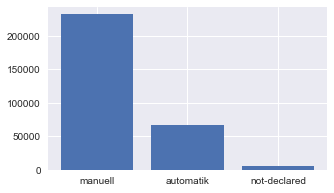

model
golf            24846
andere          21733
3er             17704
not-declared    11347
polo            10477
Name: model, dtype: int64


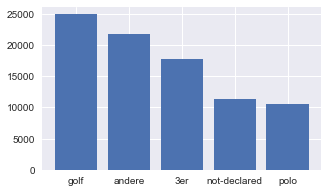

brand
volkswagen       64853
bmw              34441
opel             31757
mercedes_benz    29562
audi             27984
Name: brand, dtype: int64


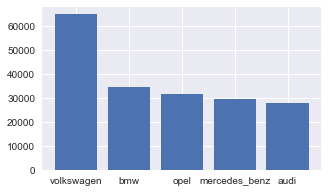

vehicleType
limousine     84843
kleinwagen    68415
kombi         59863
bus           26986
cabrio        20921
Name: vehicleType, dtype: int64


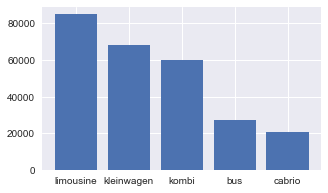

fuelType
benzin          189919
diesel           93299
not-declared     15400
lpg               4646
cng                474
Name: fuelType, dtype: int64


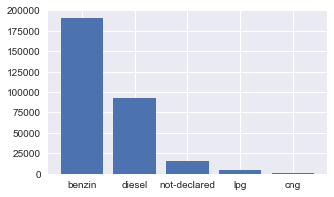

notRepairedDamage
nein            233684
not-declared     42124
ja               28325
Name: notRepairedDamage, dtype: int64


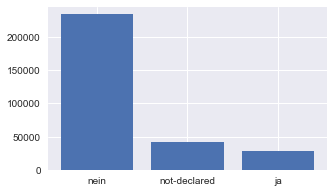

In [34]:
categories = ['gearbox', 'model', 'brand', 'vehicleType', 'fuelType', 'notRepairedDamage']

for i, c in enumerate(categories):
    v = dedups[c].unique()
    
    g = dedups.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    #plt.xticks(r, v)
    plt.xticks(r, g.index)
    plt.show()

In [12]:
dedups['namelen'] = [min(70, len(n)) for n in dedups['name']]

ax = sns.jointplot(x='namelen', 
                   y='price',
                   data=dedups[['namelen','price']], 
#                   data=dedups[['namelen','price']][dedups['model']=='golf'], 
                    alpha=0.1, 
                    size=8)

In [13]:
labels = ['name', 'gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType', 'vehicleType']
les = {}

for l in labels:
    les[l] = preprocessing.LabelEncoder()
    les[l].fit(dedups[l])
    tr = les[l].transform(dedups[l]) 
    dedups.loc[:, l + '_feat'] = pd.Series(tr, index=dedups.index)

labeled = dedups[ ['price'
                        ,'yearOfRegistration'
                        ,'powerPS'
                        ,'kilometer'
                        ,'monthOfRegistration'
                        , 'namelen'] 
                    + [x+"_feat" for x in labels]]

In [14]:
len(labeled['name_feat'].unique()) / len(labeled['name_feat'])

0.6224184813880769

In [15]:
labeled.drop(['name_feat'], axis='columns', inplace=True)


/Users/vikaschhillar/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [16]:
plot_correlation_map(labeled)
labeled.corr()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,namelen,gearbox_feat,notRepairedDamage_feat,model_feat,brand_feat,fuelType_feat,vehicleType_feat
price,1.000000,0.385264,0.573037,-0.444440,0.044782,0.186254,-0.297746,-0.002440,-0.012514,-0.105694,0.055978,-0.010906
yearOfRegistration,0.385264,1.000000,0.186486,-0.333933,0.044390,0.158798,-0.094694,-0.015699,0.041173,-0.044526,0.142402,0.058958
powerPS,0.573037,0.186486,1.000000,-0.014727,0.038635,0.106243,-0.447440,-0.022761,-0.132902,-0.310254,0.086305,0.112243
kilometer,-0.444440,-0.333933,-0.014727,1.000000,-0.016177,-0.105892,0.035524,0.005072,-0.023827,-0.026645,0.115204,0.043183
monthOfRegistration,0.044782,0.044390,0.038635,-0.016177,1.000000,0.044338,-0.049902,-0.050227,-0.009070,-0.012156,-0.035938,-0.004369
namelen,0.186254,0.158798,0.106243,-0.105892,0.044338,1.000000,-0.150795,-0.008167,0.078520,0.100056,0.043864,-0.026672
gearbox_feat,-0.297746,-0.094694,-0.447440,0.035524,-0.049902,-0.150795,1.000000,0.038948,0.046971,0.125735,-0.057441,-0.092224
notRepairedDamage_feat,-0.002440,-0.015699,-0.022761,0.005072,-0.050227,-0.008167,0.038948,1.000000,0.017825,0.016474,0.061819,0.027220
model_feat,-0.012514,0.041173,-0.132902,-0.023827,-0.009070,0.078520,0.046971,0.017825,1.000000,0.472098,0.049058,-0.136196
brand_feat,-0.105694,-0.044526,-0.310254,-0.026645,-0.012156,0.100056,0.125735,0.016474,0.472098,1.000000,-0.023840,-0.102601


In [17]:
labeled.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS                   0.573037
kilometer                 0.444440
yearOfRegistration        0.385264
gearbox_feat              0.297746
namelen                   0.186254
brand_feat                0.105694
fuelType_feat             0.055978
monthOfRegistration       0.044782
model_feat                0.012514
vehicleType_feat          0.010906
notRepairedDamage_feat    0.002440
Name: price, dtype: float64

In [18]:
Y = labeled['price']
X = labeled.drop(['price'], axis='columns', inplace=False)


matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"1. Before":Y, "2. After":np.log1p(Y)})
prices.hist()

Y = np.log1p(Y)


In [19]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, train_test_split

def cv_rmse(model, x, y):
    r = np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5))
    return r

# Percent of the X array to use as training set. This implies that the rest will be test set
test_size = .33

#Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=test_size, random_state = 3)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

r = range(2003, 2017)
km_year = 10000

(203769, 11) (100364, 11) (203769,) (100364,)


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [500]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  2.5min finished


In [21]:
print(gs.best_score_)
print(gs.best_params_)
 

0.827712103508
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}


In [22]:
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
forest.fit(X_train, y_train)
# Explained variance score: 1 is perfect prediction
print('Score: %.2f' % forest.score(X_val, y_val))

Score: 0.83


Feature ranking:
1. feature 0 (0.647206)
2. feature 1 (0.242355)
3. feature 6 (0.036250)
4. feature 10 (0.027237)
5. feature 8 (0.018246)
6. feature 2 (0.016361)
7. feature 7 (0.007608)
8. feature 4 (0.001633)
9. feature 3 (0.001424)
10. feature 9 (0.001031)
11. feature 5 (0.000648)
['yearOfRegistration' 'powerPS' 'kilometer' 'monthOfRegistration' 'namelen'
 'gearbox_feat' 'notRepairedDamage_feat' 'model_feat' 'brand_feat'
 'fuelType_feat' 'vehicleType_feat']


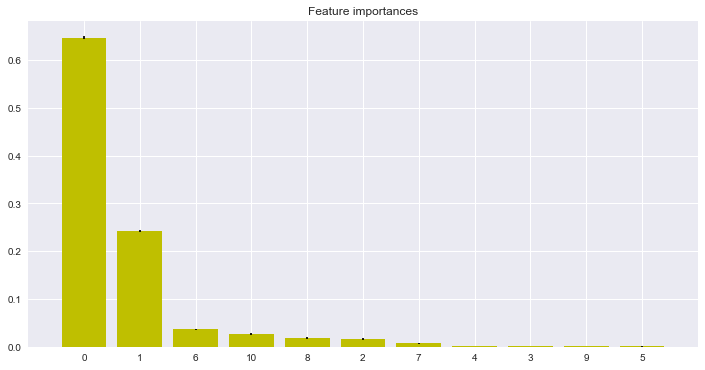

In [35]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

print(X_train.columns.values)
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="y", yerr=std[indices], align="center",tick_label = X_train.columns.values)
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()